<a href="https://colab.research.google.com/github/Don-Ho25/Colab_Git_Assignment2/blob/main/Lesson7/Lesson_7_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ASSIGNMENT 7

DONG

[link to Github](https://github.com/Don-Ho25/Colab_Git_Assignment2/blob/main/Lesson7/Lesson_7_assignment.ipynb)

## **Assignment Supervised machine Learning - Regression**

### **_House Price Prediction Using Bolton Housing Data_**
This dataset provides information about house prices in Bolton. House Price Prediction


**In this notebook, you'll follow the basic machine learning process to build a regression model to predict house prices using the "Boston Housing Dataset" from sklearn. The regression model will either be a Decision Tree or Random Forest regressor.**



---



### **Follow the instructions and complete each TODO to complete the assessment on the essential steps in building and evaluating a regression model.**


The following is a description of each column in the dataset:

Dataset Features (Bolton Housing):

* CRIM: Crime rate by town
* ZN: Proportion of residential land zoned for large lots
* INDUS: Proportion of non-retail business acres per town
* CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX: Nitric oxide concentration (parts per 10 million)
* RM: Average number of rooms per dwelling
* AGE: Proportion of owner-occupied units built before 1940
* DIS: Weighted distances to five Boston employment centers
* RAD: Index of accessibility to radial highways
* TAX: Full-value property tax rate per `$10,000`
* PTRATIO: Pupil-teacher ratio by town
* B: Proportion of Black population
* LSTAT: Percentage of lower status of the population
* MEDV (Target): Median value of owner-occupied homes in `$1,000s`



**Dataset is from sklearn Datasets**

In [68]:
import kagglehub
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [77]:

# --- Data Collection and Loading ---
# TODO: Load the 'Boston Housing' dataset from sklearn and convert it into a pandas DataFrame.
# Hint: Use `load_boston()` from `sklearn.datasets`

# Data Collection and Loading - Boston Housing Dataset

from sklearn.datasets import load_boston


load_boston = load_boston()
df = pd.DataFrame(load_boston.data, columns=load_boston.feature_names)

ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>


As the Boston Housing dataset has been removed from many databases, we will proceed with an alternative dataset to achieve the same goal.

The new dataset 'inssurance.csv' aims to predict  insurance medical costs of individuals based on:

    - age: Age of the primary beneficiary
    - sex: Gender of the insurance contractor (female, male)
    - bmi: Body Mass Index (an indicator of body weight relative to height)
    - children: Number of children/dependents covered by the insurance plan
    - smoker: Whether the individual smokes (yes/no)
    - region: The beneficiary's residential area in the U.S. (northeast, southeast, southwest, northwest)
    - charges: Individual medical costs billed by health insurance (the target variable to be predicted)

In [100]:
path = kagglehub.dataset_download("mirichoi0218/insurance")

print("Path to downloaded dataset files:", path)
csv_file_path = os.path.join(path, "insurance.csv")

df = pd.read_csv(csv_file_path)
df.head()

Path to downloaded dataset files: /kaggle/input/insurance


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [93]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [94]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

This dataset has both categorical and numerical data. The age, body mass index, and charges are continuous numerical data, and the number of children is discrete. The numerical data could be normalized. Among the categorical data, sex is binary so could be encoded with _Binary Encoding_, while region has 4 unique values making _One-Hot Encoding_ could be used in that case. There are no missing values.

In [95]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


The dataset is clean with no missing values.

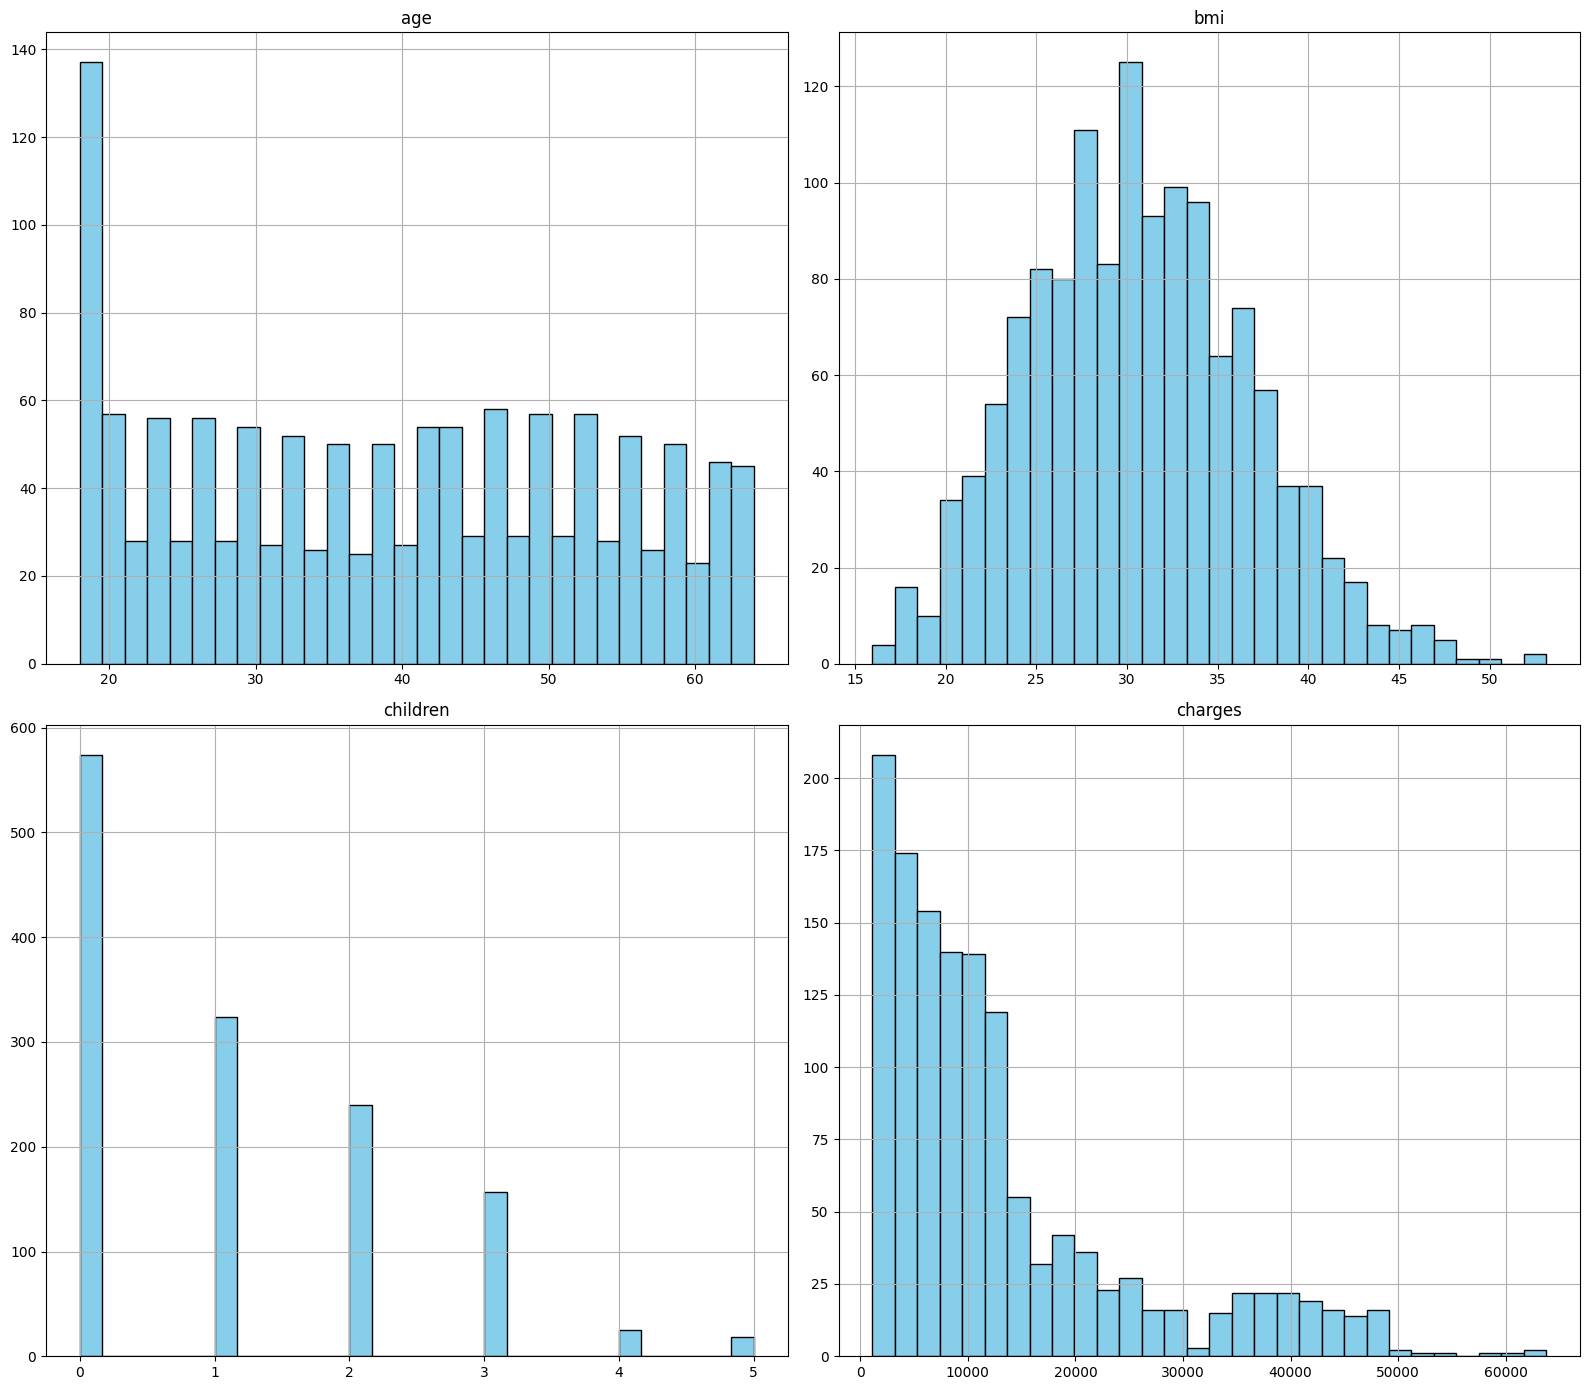

In [96]:
# Visualuze data.

df.hist(figsize=(16, 14), bins=30, color="skyblue",edgecolor='k')
plt.subplots_adjust(hspace=0.7, wspace=0.4)
plt.tight_layout()
plt.show()


EXPLANTION


- Age Distribution: There's a significantly higher proportion of individuals in their late teens/early twenties (around 18-20), while all other age groups from early twenties to mid-sixties are more evenly represented but at a lower frequency.

- BMI Distribution: The BMI values are primarily concentrated between 25 and 35, with the most common BMI value around 30, indicating that a large portion of the dataset falls into the overweight or obese category.

- Number of Children: The majority of individuals have 0 children, which aligns with the large representation of people under 20 in the dataset. Frequencies then decrease for those with 1, 2, and 3 children, with individuals having 4 or 5 children being a very small minority.

- Insurance Charges: The distribution of charges is heavily skewed to the right, showing that most people have relatively low insurance costs (primarily under $10,000-$15,000), with a long tail indicating a smaller number of individuals incurring much higher charges.

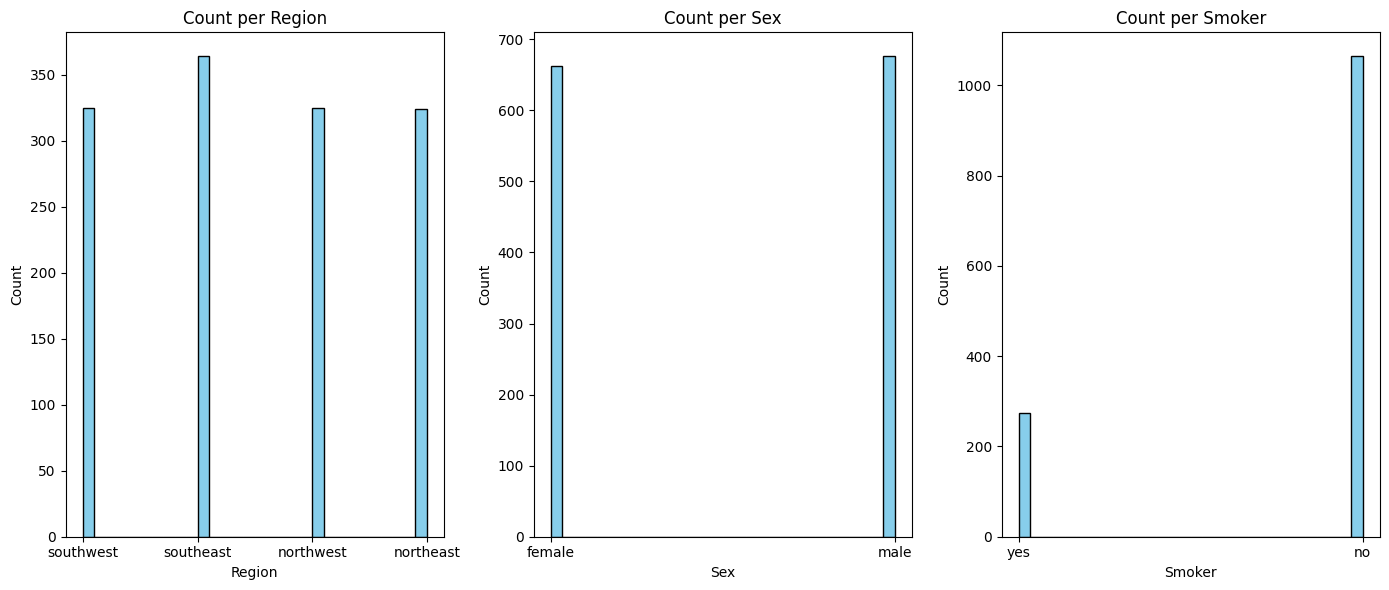

In [97]:
plt.figure(figsize=(14, 6))
plt.subplot(1,3, 1)
plt.hist(df['region'], bins=30, color='skyblue', edgecolor='k')
plt.title('Count per Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.subplot(1,3,2)
plt.hist(df['sex'], bins=30, color='skyblue', edgecolor='k')
plt.title('Count per Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.subplot(1,3,3)
plt.hist(df['smoker'], bins=30, color='skyblue', edgecolor='k')
plt.title('Count per Smoker')
plt.xlabel('Smoker')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

In the categorical data, the number of individuals is fairly evenly distributed across all regions, with each region having a comparable count. Similarly, the distribution of sex is almost balanced, with a roughly equal number of male and female participants. However, the dataset shows a clear imbalance in smoking status, with non-smokers making up the large majority (75%) of the population under investigation.

Generating scatter plots for features vs 'charges'...


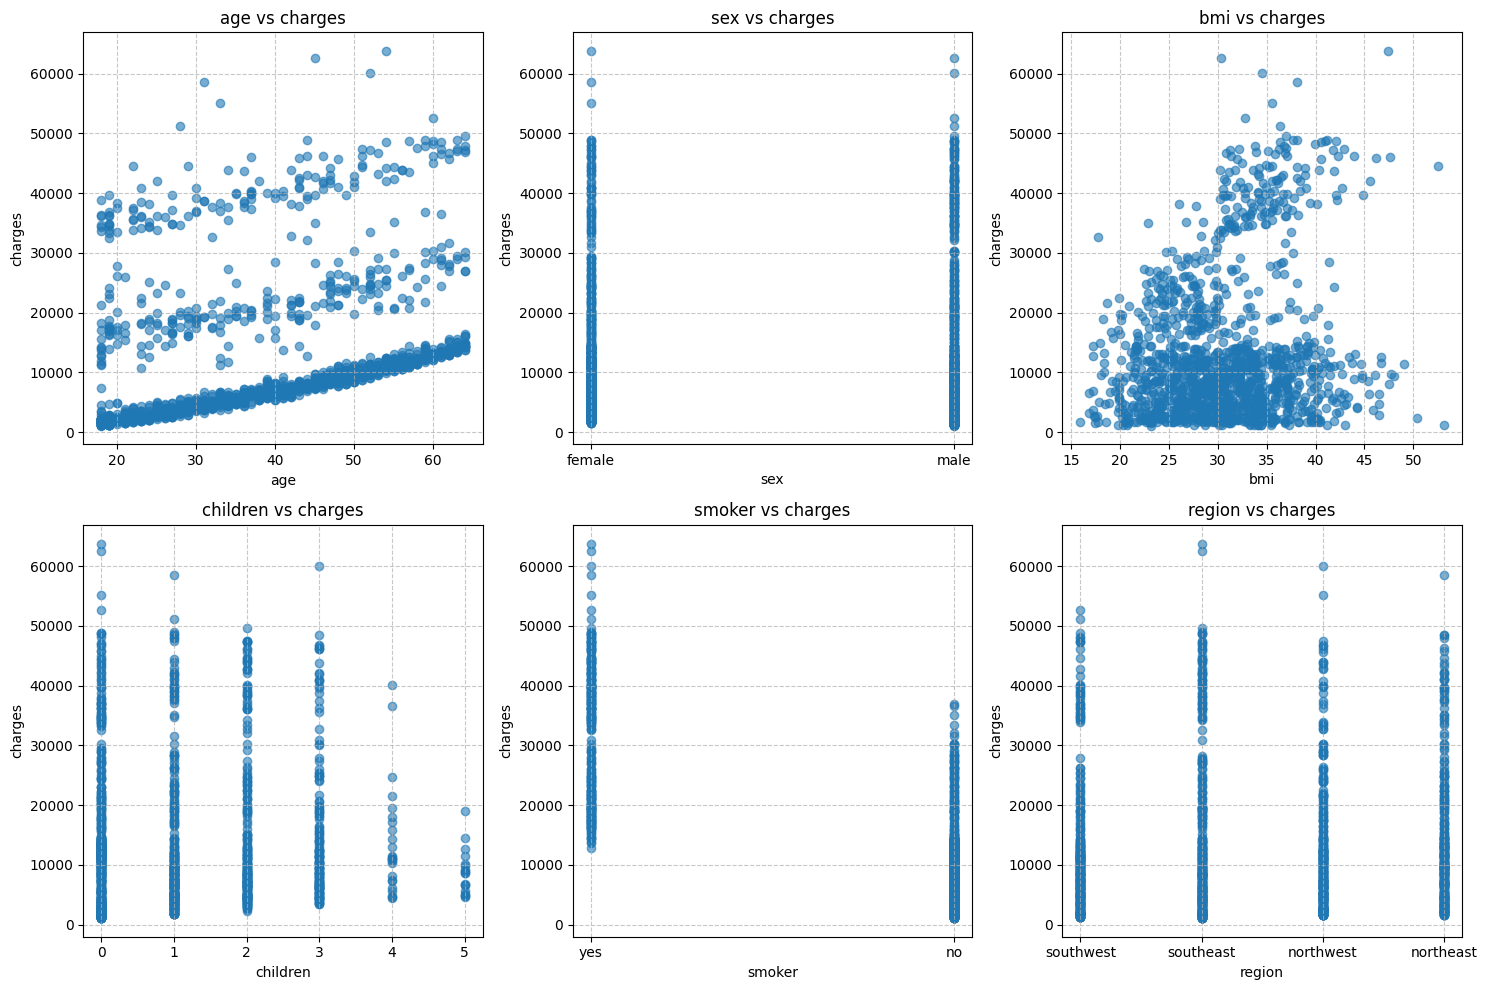

In [98]:
def Scatter_Features_vs_Target(DF, Target='charges'):

    features = DF.drop(Target, axis=1)  # All columns except target
    target = DF[Target]

    # Calculate number of subplots needed
    n_features = len(features.columns)
    n_cols = 3 # Number of columns in subplot grid
    n_rows = (n_features + n_cols - 1) // n_cols

    # Create subplots
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
    axes = axes.flatten() if n_rows > 1 else [axes]

    # Create scatter plot for each feature
    print(f"Generating scatter plots for features vs '{Target}'...")
    for i, feature in enumerate(features.columns):
        axes[i].scatter(features[feature], target, alpha=0.6)
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel(Target)
        axes[i].set_title(f'{feature} vs {Target}')
        axes[i].grid(True, linestyle='--', alpha=0.7)

    # Hide empty subplots
    for i in range(n_features, len(axes)):
        axes[i].set_visible(False)

    plt.tight_layout()
    plt.show()
### call the function
Scatter_Features_vs_Target(df)

The scatter plot of features vs target also reaveal some hidden patterns:
- Age vs. Charges : There is a general trend of increasing insurance charges with age. However, within most age groups, there's a significant cluster of people paying lower insurance, with a scattering of individuals paying higher amounts, particularly at older ages.
- Sex vs. Charges : The distribution of insurance charges appears similar for both 'female' and 'male' categories, with a wide range of charges observed in both sexes. There isn't a clear indication that one sex pays significantly more or less than the other based solely on this plot.
- BMI vs. Charges: There seems to be a positive correlation between BMI and insurance charges. As BMI increases, there's a general tendency for insurance charges to also increase, although there's considerable spread in the data.
- Children vs. Charges: The plot shows that people with more children (up to 5 in this dataset) tend to have a wider range of insurance charges, with some individuals paying significantly higher amounts compared to those with fewer children. While there isn't a strict linear increase, the maximum charges observed appear to be higher for individuals with more dependents.
- Smoker vs. Charges: As one might expect, smokers ('yes') clearly pay significantly higher insurance charges compared to non-smokers ('no'). The 'yes' category shows a concentration of very high charges, whereas the 'no' category has a much lower overall charge range.
- Region vs. Charges: The insurance charges per region (southwest, southeast, northwest, northeast) appear to be relatively balanced, with a similar distribution and range of charges across all regions. There isn't a strong indication that one region consistently pays significantly more or less than others.
---



In [114]:
# Encoded, Scaled and mormalization.

# Categorical encoding
df_encoded = pd.get_dummies(df, columns=['sex', 'smoker', 'region'])
df_encoded.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False


In [115]:
#data splitting
X = df_encoded.drop('charges', axis=1)  # Features
y = df_encoded['charges']               # Target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [116]:
X_train.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
560,46,19.95,2,True,False,True,False,False,True,False,False
1285,47,24.32,0,True,False,True,False,True,False,False,False
1142,52,24.86,0,True,False,True,False,False,False,True,False
969,39,34.32,5,True,False,True,False,False,False,True,False
486,54,21.47,3,True,False,True,False,False,True,False,False


In [117]:
# Numerical normalization
scaler = StandardScaler()
numerical_cols = ['age', 'bmi', 'children']

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test_scaled[numerical_cols] = scaler.transform(X_test[numerical_cols])
print("✅ Scaled only features, kept target in original scale")
X_train_scaled.head()

✅ Scaled only features, kept target in original scale


,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
560,0.472227,-1.756525,0.734336,True,False,True,False,False,True,False,False
1285,0.543313,-1.033082,-0.911192,True,False,True,False,True,False,False,False
1142,0.898745,-0.943687,-0.911192,True,False,True,False,False,False,True,False
969,-0.025379,0.622393,3.202629,True,False,True,False,False,False,True,False
486,1.040918,-1.504893,1.557100,True,False,True,False,False,True,False,False


It is crucial that fitting is only performed on the training data. The fitting process computes statistical information, and applying fit to the test data would lead to data leakage, providing the model with information about the test set during training.

In [118]:
model1 = DecisionTreeRegressor()
model1.fit(X_train_scaled, y_train)
y_pred1 = model1.predict(X_test_scaled)

model2 = RandomForestRegressor()
model2.fit(X_train_scaled, y_train)
y_pred2 = model2.predict(X_test_scaled)

In [126]:
# --- Model Evaluation ---

# Model 1 : Decision Tree model
RMSE1 = np.sqrt(mean_squared_error(y_test, y_pred1))
R2_squared1 = r2_score(y_test, y_pred1)

# Model 2:  Random Forest
RMSE2 = np.sqrt(mean_squared_error(y_test, y_pred2))
R2_squared2 = r2_score(y_test, y_pred2)

# Display results
print(f'Decision Tree Results:')
print(f'RMSE1: ${RMSE1:,.2f}')
print(f'R2_1: {R2_squared1:.4f} ({R2_squared1*100:.1f}%)')
print()
print(f'Random Forest Results:')
print(f'RMSE2: ${RMSE2:,.2f}')
print(f'R2_2: {R2_squared2:.4f} ({R2_squared2*100:.1f}%)')


Decision Tree Results:
RMSE1: $6,599.49
R2_1: 0.7195 (71.9%)

Random Forest Results:
RMSE2: $4,596.14
R2_2: 0.8639 (86.4%)


*Performance Assessment*

For the Random Forest model, a low Root Mean Squared Error (RMSE) indicates high accuracy, while a high R-squared (R2) value signifies strong predictive power. In summary, the Random Forest model demonstrates superior performance compared to the Decision Tree model on this dataset.

In [127]:
# --- Model Prediction ---

#    Define the data
test_case_1 = {
    'age': 29,
    'sex': 'female',
    'bmi': 24.8,
    'children': 1,
    'smoker': 'no',
    'region': 'northeast'
}

test_case_2 = {
    'age': 42,
    'sex': 'male',
    'bmi': 31.2,
    'children': 3,
    'smoker': 'yes',
    'region': 'southwest'
}

test_df = pd.DataFrame([test_case_1, test_case_2])
test_df

,age,sex,bmi,children,smoker,region
0,29,female,24.8,1,no,northeast
1,42,male,31.2,3,yes,southwest


In [128]:
data_encoded = pd.get_dummies(test_df,
                                 columns=['sex', 'smoker', 'region'],
                                 drop_first=True)


data_scaled = data_encoded.copy()
data_scaled[numerical_cols] = scaler.transform(data_encoded[numerical_cols])
data_scaled

,age,bmi,children,sex_male,smoker_yes,region_southwest
0,-0.736243,-0.953620,-0.088428,False,False,False
1,0.187881,0.105885,1.557100,True,True,True


In [133]:
prediction = model2.predict(data_scaled)
prediction



ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- region_northeast
- sex_female
- smoker_no


**We could not predict because of new column create in the data set by the encoding**